<a href="https://colab.research.google.com/github/Subh12gd/python/blob/main/Copy_of_python1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mileage prediction - Regression Analysis**

**Objective:**

The objective of this project is to develop a predictive model for vehicle mileage using regression analysis. The model aims to establish a mathematical relationship between relevant variables (such as vehicle specifications and driving conditions) and fuel efficiency. This can aid in performance assessment, resource planning, and decision-making for individuals and businesses in the automotive sector.

**source:**

This dataset was taken from the statLib library which is maintained at Camegie Mellon university.The dataset was used in the 1983 American statistical Association Exposition.

**Data set information:**

This dataset is slightly modified version of dataset provided in the statLib library.In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg",8 of the original instances were remove because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon,to be predicted in terms of 3 multivalued discrete and 5 continuous attribute" (Quinlan,1993)

**Attribute informatin:**

1. mpg: continuous
2.cylinders: multi-valued discrete
3.displacement: continuous
4.horsepower: continuous
5.weight: continuous
6.acceleration : continuous
7.model year: multi-valued discrete
8.origin: multi-valuued discrete
9.car name: string(unique of each intance)


# **Import library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# **import data**

In [ ]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


# **Data preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
numerical_features = df.select_dtypes(include=np.number)

In [ ]:
correlation_matrix = numerical_features.corr()

In [ ]:
print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   

              acceleration  model_year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.689196   -0.416361  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model_year        0.288137    1.000000  


# **Remove missing value**

In [ ]:
df= df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cylinders      392 non-null    int64  
 2   displacement   392 non-null    float64
 3   horsepower     392 non-null    float64
 4   weight         392 non-null    int64  
 5   acceleration   392 non-null    float64
 6   model_year     392 non-null    int64  
 7   name           392 non-null    object 
 8   origin_europe  392 non-null    bool   
 9   origin_japan   392 non-null    bool   
 10  origin_usa     392 non-null    bool   
dtypes: bool(3), float64(4), int64(3), object(1)
memory usage: 28.7+ KB


# **Data visualization**

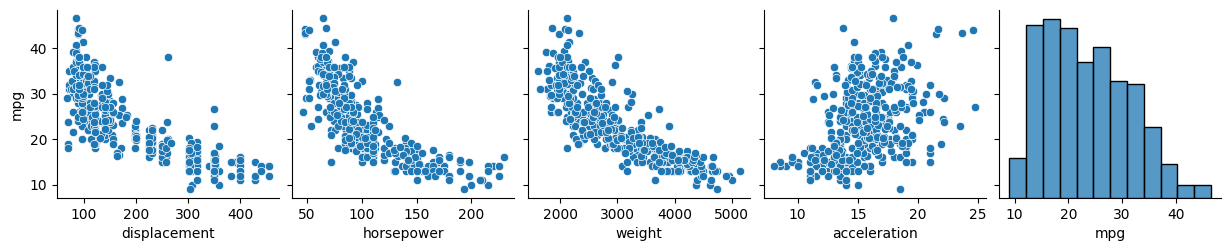

In [ ]:
sns.pairplot(df, x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg']);

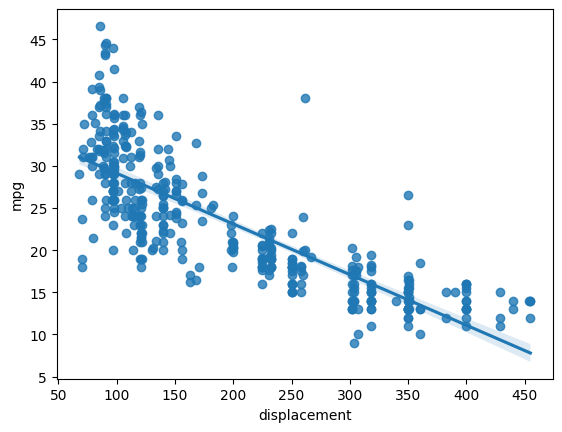

In [ ]:
sns.regplot(x='displacement',y='mpg',data=df);

# **Define Target variable Y and Feature X**

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'name', 'origin_europe', 'origin_japan',
       'origin_usa'],
      dtype='object')

In [ ]:
y=df['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
x=df[['displacement','horsepower','weight','acceleration']]

In [ ]:
x.shape

(392, 4)

In [ ]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


# **Scaling Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss= StandardScaler()

In [ ]:
x=ss.fit_transform(x)

In [ ]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


# **Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=2529)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((117, 4), (275, 4), (117,), (275,))

# **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

23.601118059983822

In [ ]:
lr.coef_

array([-1.07085922, -0.64133484, -5.18021642,  0.26756035])

**Mileage=23.4-1.05Displacement-1.68Horsepower-4.10Weight-0.115Acceleration+error**

# **Predict Test Data**

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([18.83232615, 14.67689764, 13.90916105, 23.48706843, 30.25543552,
       23.46671071, 27.28163576, 24.60121655, 14.40764431, 10.81692289,
       24.30874146, 27.9134718 , 31.87135668, 31.42289874, 17.69562279,
       19.09989244, 28.60563403, 32.67685665, 31.45063299, 27.35959705,
       18.46314382, 22.19920123, 26.2982957 , 33.03335117, 20.48801313,
        9.54351607, 22.40016431, 18.3349025 , 24.90567933, 17.72005616,
       23.00135022, 16.88953804, 10.57530881, 30.26775706, 20.13255834,
       29.29639211, 24.89285218, 21.37238187,  9.68643504, 12.73666785,
       20.95618571, 20.11237202,  6.42862798, 17.31748152, 22.17367358,
       29.47288305, 13.72946495, 25.84603835, 30.3260242 , 22.49617884,
       21.32125793, 16.21218023, 23.82532354, 30.39683971,  9.25868474,
       10.87274956, 28.51433586, 23.14656115, 20.00708585, 31.00621369,
       20.4572209 , 27.13086597, 22.2195037 , 13.80505274, 25.30799492,
       27.41913866, 15.02111221, 24.0510285 , 31.58339665, 14.71

# **Model Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred)

3.3564087099398776

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.14970671967399587

In [ ]:
r2_score(y_test,y_pred)

0.6923289624942408

# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly= PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [ ]:
x_train2=poly.fit_transform(x_train)

In [ ]:
x_test2=poly.fit_transform(x_test)

In [ ]:
lr.fit(x_train2,y_train)

LinearRegression()

In [ ]:
lr.intercept_

21.55533901604716

In [ ]:
lr.coef_

array([-2.2748814 , -3.73899676, -2.6609481 ,  0.24305983,  2.0800206 ,
       -0.80160787, -3.04666232,  2.11059861,  1.49729576,  2.93749665])

In [ ]:
y_pred2=lr.predict(x_test2)

# **Model Accuracy**

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_error(y_test,y_pred2)

3.205494068743995

In [ ]:
mean_absolute_percentage_error(y_test,y_pred2)

0.14706619052559178

In [ ]:
r2_score(y_test,y_pred2)

0.6842004879324937

# **Explanation**

This Mileage Prediction Machine Learning (ML) project involves developing a model that can accurately predict the fuel efficiency or mileage of a vehicle based on specific input features. Here is a brief explanation of the key steps and components involved:

1.**Data Collection and Preprocessing:** Gather and clean the dataset, handle missing values, outliers, and categorical variables.

2.**Feature Selection/Engineering:** Identify and transform relevant features to improve model performance.

3.**Data Splitting:**Split the dataset into training and testing subsets for model training and evaluation.

4.**Model Selection:** Choose an appropriate regression algorithm, such as Linear Regression, for the prediction task.

5.**Model Training:** Train the model to learn the relationships between input features and mileage.

6.**Model Evaluation:** Assess model performance using evaluation metrics like MSE, RMSE, MAE, and R-squared.

7.**Hyperparameter Tuning (Optional):** Optimize the model by tuning hyperparameters.

8.**Prediction and Deployment (Optional):** Deploy the model for real-world predictions and usage.

9.**Iterative Refinement:** Continuously improve the model by revisiting earlier steps.

By following these steps, the project demonstrates the application of machine learning to solve real-world problems in the automotive domain, providing insights into vehicle fuel efficiency and offering a useful tool for various stakeholders.
**Future Scope**

1.**Enhanced Feature Engineering:** Incorporate additional features such as driving habits, road conditions, and weather data to improve the predictive accuracy of the model.

2.**Advanced Algorithms:** Experiment with more complex algorithms like Gradient Boosting, Random Forest, and Neural Networks to potentially improve prediction performance.

3.**Real-Time Predictions: **Develop a real-time mileage prediction tool that can be integrated into vehicle dashboards or mobile applications for instant feedback.

4.**Model Interpretability:** Enhance the interpretability of the model to better understand the influence of each feature on mileage predictions.

5.**Scalability:**Adapt the model to handle larger datasets, potentially incorporating data from various sources such as IoT devices and sensors in vehicles.

6.**Customization:** Create customized models for different vehicle types (e.g., electric vs. gasoline) to improve prediction accuracy across diverse vehicle categories.

7.**Predictive Maintenance:** Extend the model to predict maintenance needs based on mileage and usage patterns, helping vehicle owners to optimize maintenance schedules.